<img src="https://cdn.siberian.dev/siberian.png" alt="Siberian Logo">

### CatBoostClassifier With StandardScaler

This Code template is for the Classification task using CatBoostClassifier. Along with model training, the template illustrates the impact of data rescaling using the StandardScaler function on the model accuracy.

## Required Packages

In [4]:
import numpy as np
import pandas as pd
import seaborn as se
import warnings
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import classification_report,plot_confusion_matrix
warnings.filterwarnings('ignore')

## Initialization

Filepath of CSV file

In [22]:
#filepath
file_path=""

List of features which are required for model training 

In [23]:
#x_values
features=[]

Target feature for prediction

In [25]:
#y_value
target=''

## Data Fetching

Pandas is an open-source, BSD-licensed library providing high-performance, easy-to-use data manipulation and data analysis tools.

We will use panda's library to read the CSV file using its storage path.And we use the head function to display the initial row or entry.

In [26]:
df=pd.read_csv(file_path)
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


## Feature Selections

It is the process of reducing the number of input variables when developing a predictive model. Used to reduce the number of input variables to both reduce the computational cost of modelling and, in some cases, to improve the performance of the model.

We will assign all the required input features to X and target/outcome to Y.

In [27]:
X=df[features]
Y=df[target]

## Data Preprocessing

Since the majority of the machine learning models in the Sklearn library doesn't handle string category data and Null value, we have to explicitly remove or replace null values. The below snippet have functions, which removes the null value if any exists. And convert the string classes data in the datasets by encoding them to integer classes

In [28]:
def NullClearner(df):
    if(isinstance(df, pd.Series) and (df.dtype in ["float64","int64"])):
        df.fillna(df.mean(),inplace=True)
        return df
    elif(isinstance(df, pd.Series)):
        df.fillna(df.mode()[0],inplace=True)
        return df
    else:return df
def EncodeX(df):
    return pd.get_dummies(df)
def EncodeY(df):
    if len(df.unique())<=2:
        return df
    else:
        un_EncodedT=np.sort(pd.unique(df), axis=-1, kind='mergesort')
        df=LabelEncoder().fit_transform(df)
        EncodedT=[xi for xi in range(len(un_EncodedT))]
        print("Encoded Target: {} to {}".format(un_EncodedT,EncodedT))
        return df

Calling preprocessing functions on the feature and target set.

In [29]:
x=X.columns.to_list()
for i in x:
    X[i]=NullClearner(X[i])
X=EncodeX(X)
Y=EncodeY(NullClearner(Y))
X.head()

Encoded Target: ['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish'] to [0, 1, 2, 3, 4, 5, 6]


,Weight,Length1,Length2,Length3,Height,Width
0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34.0,12.4440,5.1340


## Correlation Map

In order to check the correlation between the features, we will plot a correlation matrix. It is effective in summarizing a large amount of data where the goal is to see patterns.

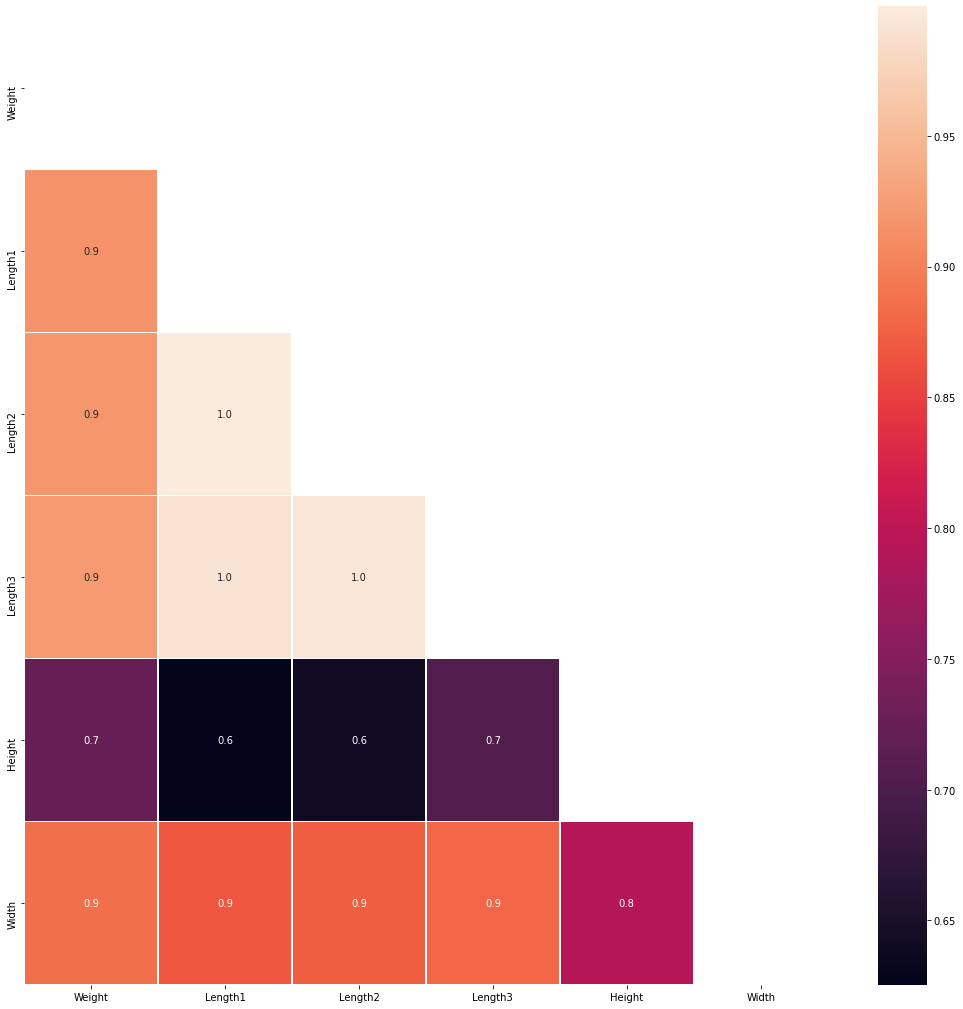

In [30]:
f,ax = plt.subplots(figsize=(18, 18))
matrix = np.triu(X.corr())
se.heatmap(X.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax, mask=matrix)
plt.show()

## Distribution Of Target Variable

<AxesSubplot:ylabel='count'>

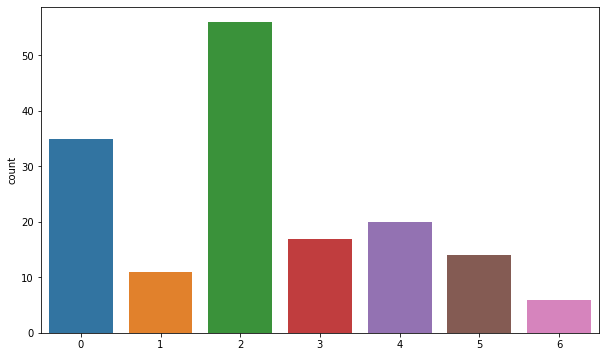

In [31]:
plt.figure(figsize = (10,6))
se.countplot(Y)

## Data Splitting

The train-test split is a procedure for evaluating the performance of an algorithm. The procedure involves taking a dataset and dividing it into two subsets. The first subset is utilized to fit/train the model. The second subset is used for prediction. The main motive is to estimate the performance of the model on new data.

In [32]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=123)

## Handling Target Imbalance

The challenge of working with imbalanced datasets is that most machine learning techniques will ignore, and in turn have poor performance on, the minority class, although typically it is performance on the minority class that is most important.

One approach to addressing imbalanced datasets is to oversample the minority class. The simplest approach involves duplicating examples in the minority class.We will perform overspampling using imblearn library.

In [33]:
x_train,y_train = RandomOverSampler(random_state=123).fit_resample(x_train, y_train)

## Data Rescaling

StandardScaler follows Standard Normal Distribution (SND). Therefore, it makes mean = 0 and scales the data to unit variance.

Refer [API](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

In [34]:
Scaler = StandardScaler()
x_train = Scaler.fit_transform(x_train)
x_test = Scaler.transform(x_test)

## Model

CatBoost is an algorithm for gradient boosting on decision trees. Developed by Yandex researchers and engineers, it is the successor of the MatrixNet algorithm that is widely used within the company for ranking tasks, forecasting and making recommendations.

Model Tuning Parameters
> **learning_rate  ->** it is defined automatically for Logloss, MultiClass & RMSE loss functions depending on the number of iterations if none of these parameters is set.The learning rate is used for reducing the gradient step.

> **l2_leaf_reg  ->**  Coefficient at the L2 regularization term of the cost function. Any positive value is allowed.

> **bootstrap_type  ->** Defines the method for sampling the weights of objects.

> **subsample  ->** Sample rate for bagging. This parameter can be used if one of the following bootstrap types is selected:

 > * Poisson
 > * Bernoulli
 > * MVS

For more info: [API](https://catboost.ai/docs/concepts/python-reference_catboostclassifier.html)

In [35]:
model=CatBoostClassifier()
model.fit(x_train,y_train)

Learning rate set to 0.074846
0:	learn: 1.8175409	total: 10.1ms	remaining: 10.1s
1:	learn: 1.7047667	total: 13.6ms	remaining: 6.78s
2:	learn: 1.5815906	total: 16.8ms	remaining: 5.58s
3:	learn: 1.4711077	total: 20.2ms	remaining: 5.03s
4:	learn: 1.3723800	total: 23.6ms	remaining: 4.7s
5:	learn: 1.3060029	total: 26.7ms	remaining: 4.42s
6:	learn: 1.2429105	total: 30ms	remaining: 4.26s
7:	learn: 1.1846471	total: 33.3ms	remaining: 4.12s
8:	learn: 1.1245041	total: 36.7ms	remaining: 4.04s
9:	learn: 1.0741436	total: 40ms	remaining: 3.96s
10:	learn: 1.0344668	total: 43ms	remaining: 3.86s
11:	learn: 0.9841044	total: 46.1ms	remaining: 3.8s
12:	learn: 0.9427006	total: 49.4ms	remaining: 3.75s
13:	learn: 0.9082458	total: 52.7ms	remaining: 3.71s
14:	learn: 0.8744537	total: 55.7ms	remaining: 3.65s
15:	learn: 0.8419513	total: 59.1ms	remaining: 3.63s
16:	learn: 0.8103810	total: 62.1ms	remaining: 3.59s
17:	learn: 0.7859023	total: 65.1ms	remaining: 3.55s
18:	learn: 0.7594561	total: 68.5ms	remaining: 3.54s


175:	learn: 0.1441901	total: 525ms	remaining: 2.46s
176:	learn: 0.1433941	total: 528ms	remaining: 2.46s
177:	learn: 0.1425144	total: 531ms	remaining: 2.45s
178:	learn: 0.1417384	total: 534ms	remaining: 2.45s
179:	learn: 0.1409222	total: 537ms	remaining: 2.45s
180:	learn: 0.1403515	total: 541ms	remaining: 2.45s
181:	learn: 0.1397254	total: 544ms	remaining: 2.44s
182:	learn: 0.1385101	total: 547ms	remaining: 2.44s
183:	learn: 0.1375563	total: 550ms	remaining: 2.44s
184:	learn: 0.1371924	total: 552ms	remaining: 2.43s
185:	learn: 0.1369442	total: 556ms	remaining: 2.43s
186:	learn: 0.1364609	total: 558ms	remaining: 2.43s
187:	learn: 0.1363590	total: 561ms	remaining: 2.42s
188:	learn: 0.1354591	total: 563ms	remaining: 2.42s
189:	learn: 0.1344426	total: 566ms	remaining: 2.41s
190:	learn: 0.1332840	total: 569ms	remaining: 2.41s
191:	learn: 0.1328809	total: 572ms	remaining: 2.41s
192:	learn: 0.1319596	total: 574ms	remaining: 2.4s
193:	learn: 0.1309636	total: 577ms	remaining: 2.4s
194:	learn: 0.

363:	learn: 0.0627349	total: 1.05s	remaining: 1.84s
364:	learn: 0.0624973	total: 1.06s	remaining: 1.84s
365:	learn: 0.0621818	total: 1.06s	remaining: 1.83s
366:	learn: 0.0619955	total: 1.06s	remaining: 1.83s
367:	learn: 0.0616506	total: 1.06s	remaining: 1.83s
368:	learn: 0.0613509	total: 1.07s	remaining: 1.83s
369:	learn: 0.0611822	total: 1.07s	remaining: 1.82s
370:	learn: 0.0610101	total: 1.07s	remaining: 1.82s
371:	learn: 0.0608204	total: 1.08s	remaining: 1.82s
372:	learn: 0.0605971	total: 1.08s	remaining: 1.81s
373:	learn: 0.0604745	total: 1.08s	remaining: 1.81s
374:	learn: 0.0603221	total: 1.08s	remaining: 1.81s
375:	learn: 0.0600501	total: 1.09s	remaining: 1.81s
376:	learn: 0.0597622	total: 1.09s	remaining: 1.8s
377:	learn: 0.0595706	total: 1.09s	remaining: 1.8s
378:	learn: 0.0592999	total: 1.1s	remaining: 1.8s
379:	learn: 0.0590580	total: 1.1s	remaining: 1.79s
380:	learn: 0.0588127	total: 1.1s	remaining: 1.79s
381:	learn: 0.0586241	total: 1.11s	remaining: 1.79s
382:	learn: 0.0584

552:	learn: 0.0353479	total: 1.58s	remaining: 1.28s
553:	learn: 0.0352309	total: 1.59s	remaining: 1.28s
554:	learn: 0.0351476	total: 1.59s	remaining: 1.27s
555:	learn: 0.0350837	total: 1.59s	remaining: 1.27s
556:	learn: 0.0349990	total: 1.6s	remaining: 1.27s
557:	learn: 0.0349023	total: 1.6s	remaining: 1.27s
558:	learn: 0.0348405	total: 1.6s	remaining: 1.26s
559:	learn: 0.0347107	total: 1.6s	remaining: 1.26s
560:	learn: 0.0346616	total: 1.61s	remaining: 1.26s
561:	learn: 0.0345931	total: 1.61s	remaining: 1.25s
562:	learn: 0.0345410	total: 1.61s	remaining: 1.25s
563:	learn: 0.0344799	total: 1.62s	remaining: 1.25s
564:	learn: 0.0343840	total: 1.62s	remaining: 1.25s
565:	learn: 0.0343233	total: 1.62s	remaining: 1.24s
566:	learn: 0.0342719	total: 1.63s	remaining: 1.24s
567:	learn: 0.0341484	total: 1.63s	remaining: 1.24s
568:	learn: 0.0340966	total: 1.63s	remaining: 1.24s
569:	learn: 0.0340299	total: 1.63s	remaining: 1.23s
570:	learn: 0.0339640	total: 1.64s	remaining: 1.23s
571:	learn: 0.03

738:	learn: 0.0241025	total: 2.11s	remaining: 746ms
739:	learn: 0.0240672	total: 2.11s	remaining: 743ms
740:	learn: 0.0240029	total: 2.12s	remaining: 740ms
741:	learn: 0.0239430	total: 2.12s	remaining: 737ms
742:	learn: 0.0238788	total: 2.12s	remaining: 735ms
743:	learn: 0.0238384	total: 2.13s	remaining: 732ms
744:	learn: 0.0237920	total: 2.13s	remaining: 729ms
745:	learn: 0.0237481	total: 2.13s	remaining: 726ms
746:	learn: 0.0237116	total: 2.13s	remaining: 723ms
747:	learn: 0.0236822	total: 2.14s	remaining: 720ms
748:	learn: 0.0236254	total: 2.14s	remaining: 717ms
749:	learn: 0.0235832	total: 2.14s	remaining: 714ms
750:	learn: 0.0235483	total: 2.14s	remaining: 711ms
751:	learn: 0.0235129	total: 2.15s	remaining: 708ms
752:	learn: 0.0234637	total: 2.15s	remaining: 705ms
753:	learn: 0.0234164	total: 2.15s	remaining: 702ms
754:	learn: 0.0233704	total: 2.15s	remaining: 699ms
755:	learn: 0.0233316	total: 2.16s	remaining: 696ms
756:	learn: 0.0232824	total: 2.16s	remaining: 694ms
757:	learn: 

928:	learn: 0.0180002	total: 2.64s	remaining: 202ms
929:	learn: 0.0179784	total: 2.65s	remaining: 199ms
930:	learn: 0.0179602	total: 2.65s	remaining: 196ms
931:	learn: 0.0179203	total: 2.65s	remaining: 194ms
932:	learn: 0.0178988	total: 2.65s	remaining: 191ms
933:	learn: 0.0178745	total: 2.66s	remaining: 188ms
934:	learn: 0.0178556	total: 2.66s	remaining: 185ms
935:	learn: 0.0178374	total: 2.66s	remaining: 182ms
936:	learn: 0.0178145	total: 2.67s	remaining: 179ms
937:	learn: 0.0177980	total: 2.67s	remaining: 176ms
938:	learn: 0.0177790	total: 2.67s	remaining: 174ms
939:	learn: 0.0177470	total: 2.67s	remaining: 171ms
940:	learn: 0.0177255	total: 2.68s	remaining: 168ms
941:	learn: 0.0177068	total: 2.68s	remaining: 165ms
942:	learn: 0.0176587	total: 2.68s	remaining: 162ms
943:	learn: 0.0176242	total: 2.69s	remaining: 159ms
944:	learn: 0.0176051	total: 2.69s	remaining: 156ms
945:	learn: 0.0175663	total: 2.69s	remaining: 154ms
946:	learn: 0.0175443	total: 2.69s	remaining: 151ms
947:	learn: 

## Model Accuracy

score() method return the mean accuracy on the given test data and labels.

In multi-label classification, this is the subset accuracy which is a harsh metric since you require for each sample that each label set be correctly predicted.

In [36]:
print("Accuracy score {:.2f} %\n".format(model.score(x_test,y_test)*100))

Accuracy score 75.00 %



## Confusion Matrix

A confusion matrix is utilized to understand the performance of the classification model or algorithm in machine learning for a given test set where results are known.

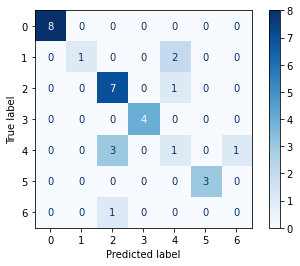

In [37]:
plot_confusion_matrix(model,x_test,y_test,cmap=plt.cm.Blues)

## Classification Report
A Classification report is used to measure the quality of predictions from a classification algorithm. How many predictions are True, how many are False.

where:
- Precision:- Accuracy of positive predictions.
- Recall:- Fraction of positives that were correctly identified.
- f1-score:-  percent of positive predictions were correct
- support:- Support is the number of actual occurrences of the class in the specified dataset.

In [38]:
print(classification_report(y_test,model.predict(x_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      0.33      0.50         3
           2       0.64      0.88      0.74         8
           3       1.00      1.00      1.00         4
           4       0.25      0.20      0.22         5
           5       1.00      1.00      1.00         3
           6       0.00      0.00      0.00         1

    accuracy                           0.75        32
   macro avg       0.70      0.63      0.64        32
weighted avg       0.76      0.75      0.73        32



#### Creator: Aishwarya Guntoju , Github: [Profile](https://github.com/DSAishwaryaG)